<a href="https://colab.research.google.com/github/hannah-g03/APP-project/blob/main/ml-assignment-breast-cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment

**Dataset**:       BREAST CANCER

**Student ID**:    

**Student Name**:  

## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [22]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
from pandas.plotting import scatter_matrix

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

## Loading the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('data/breast-cancer.csv')

# printing out dataset info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   radius_mean              550 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimter_mean            567 non-null    float64
 4   area_mean                566 non-null    float64
 5   smoothness_mean          567 non-null    float64
 6   compactness_mean         566 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            566 non-null    float64
 10  fractal_dimension_mean   567 non-null    float64
 11  radius_error             551 non-null    float64
 12  texture_error            567 non-null    float64
 13  perimeter_error          568 non-null    float64
 14  area_error               5

,id,radius_mean,texture_mean,perimter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,class
0,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,NaN,0.4601,0.11890,M
1,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

In [ ]:
#Description of dataset
print(df.describe())

                 id  radius_mean  texture_mean  perimter_mean    area_mean  \
count  5.680000e+02   550.000000    568.000000     567.000000   566.000000   
mean   3.042370e+07    14.384936     19.280986      92.010459   654.704064   
std    1.251247e+08     7.155929      4.299856      24.322495   352.102951   
min    8.670000e+03     6.981000      9.710000      43.790000   143.500000   
25%    8.691895e+05    11.702500     16.170000      75.190000   420.300000   
50%    9.060010e+05    13.375000     18.835000      86.240000   548.750000   
75%    8.825022e+06    15.772500     21.785000     104.200000   782.675000   
max    9.113205e+08   160.130000     39.280000     188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       567.000000        566.000000      569.000000           569.000000   
mean          0.096376          0.104220        0.088799             0.048919   
std           0.014074          0.052820        0.0797

In [ ]:
unique_values = df['class'].unique()
print(unique_values) #seeing what the values are

print(df['class'].value_counts()) #class balance


['M' 'B']
B    358
M    211
Name: class, dtype: int64


In [ ]:
#seeing where the missing values are
missing_values = df.isna().sum()
print(missing_values)

id                          1
radius_mean                19
texture_mean                1
perimter_mean               2
area_mean                   3
smoothness_mean             2
compactness_mean            3
concavity_mean              0
concave_points_mean         0
symmetry_mean               3
fractal_dimension_mean      2
radius_error               18
texture_error               2
perimeter_error             1
area_error                  2
smoothness_error            3
compactness_error           1
concavity_error             1
concave_points_error        2
symmetry_error              1
fractal_dimension_error     2
radius_worst               18
texture_worst               3
perimeter_worst             2
area_worst                  3
smoothness_worst            0
compactness_worst           4
concavity_worst             2
concave_points_worst        3
symmetry_worst              3
fractal_dimension_worst     4
class                       0
dtype: int64


In [ ]:
#the different feature types
feature_types = df.dtypes
print(feature_types)

id                         float64
radius_mean                float64
texture_mean               float64
perimter_mean              float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_error               float64
texture_error              float64
perimeter_error            float64
area_error                 float64
smoothness_error           float64
compactness_error          float64
concavity_error            float64
concave_points_error       float64
symmetry_error             float64
fractal_dimension_error    float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

['M' 'B']


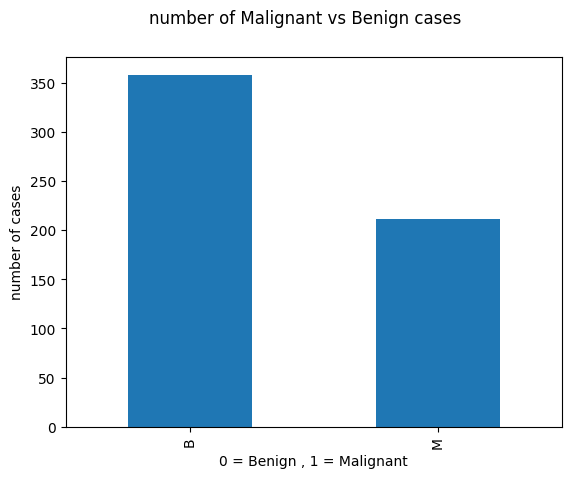

In [ ]:
unique_values = df['class'].unique()
print(unique_values) #seeing what the values are

plt.figure();
plt.suptitle('number of Malignant vs Benign cases')
plt.xlabel('0 = Benign , 1 = Malignant')
plt.ylabel('number of cases')
df['class'].value_counts().plot(kind='bar');

<Axes: title={'center': 'radius_mean for benign cases'}, ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

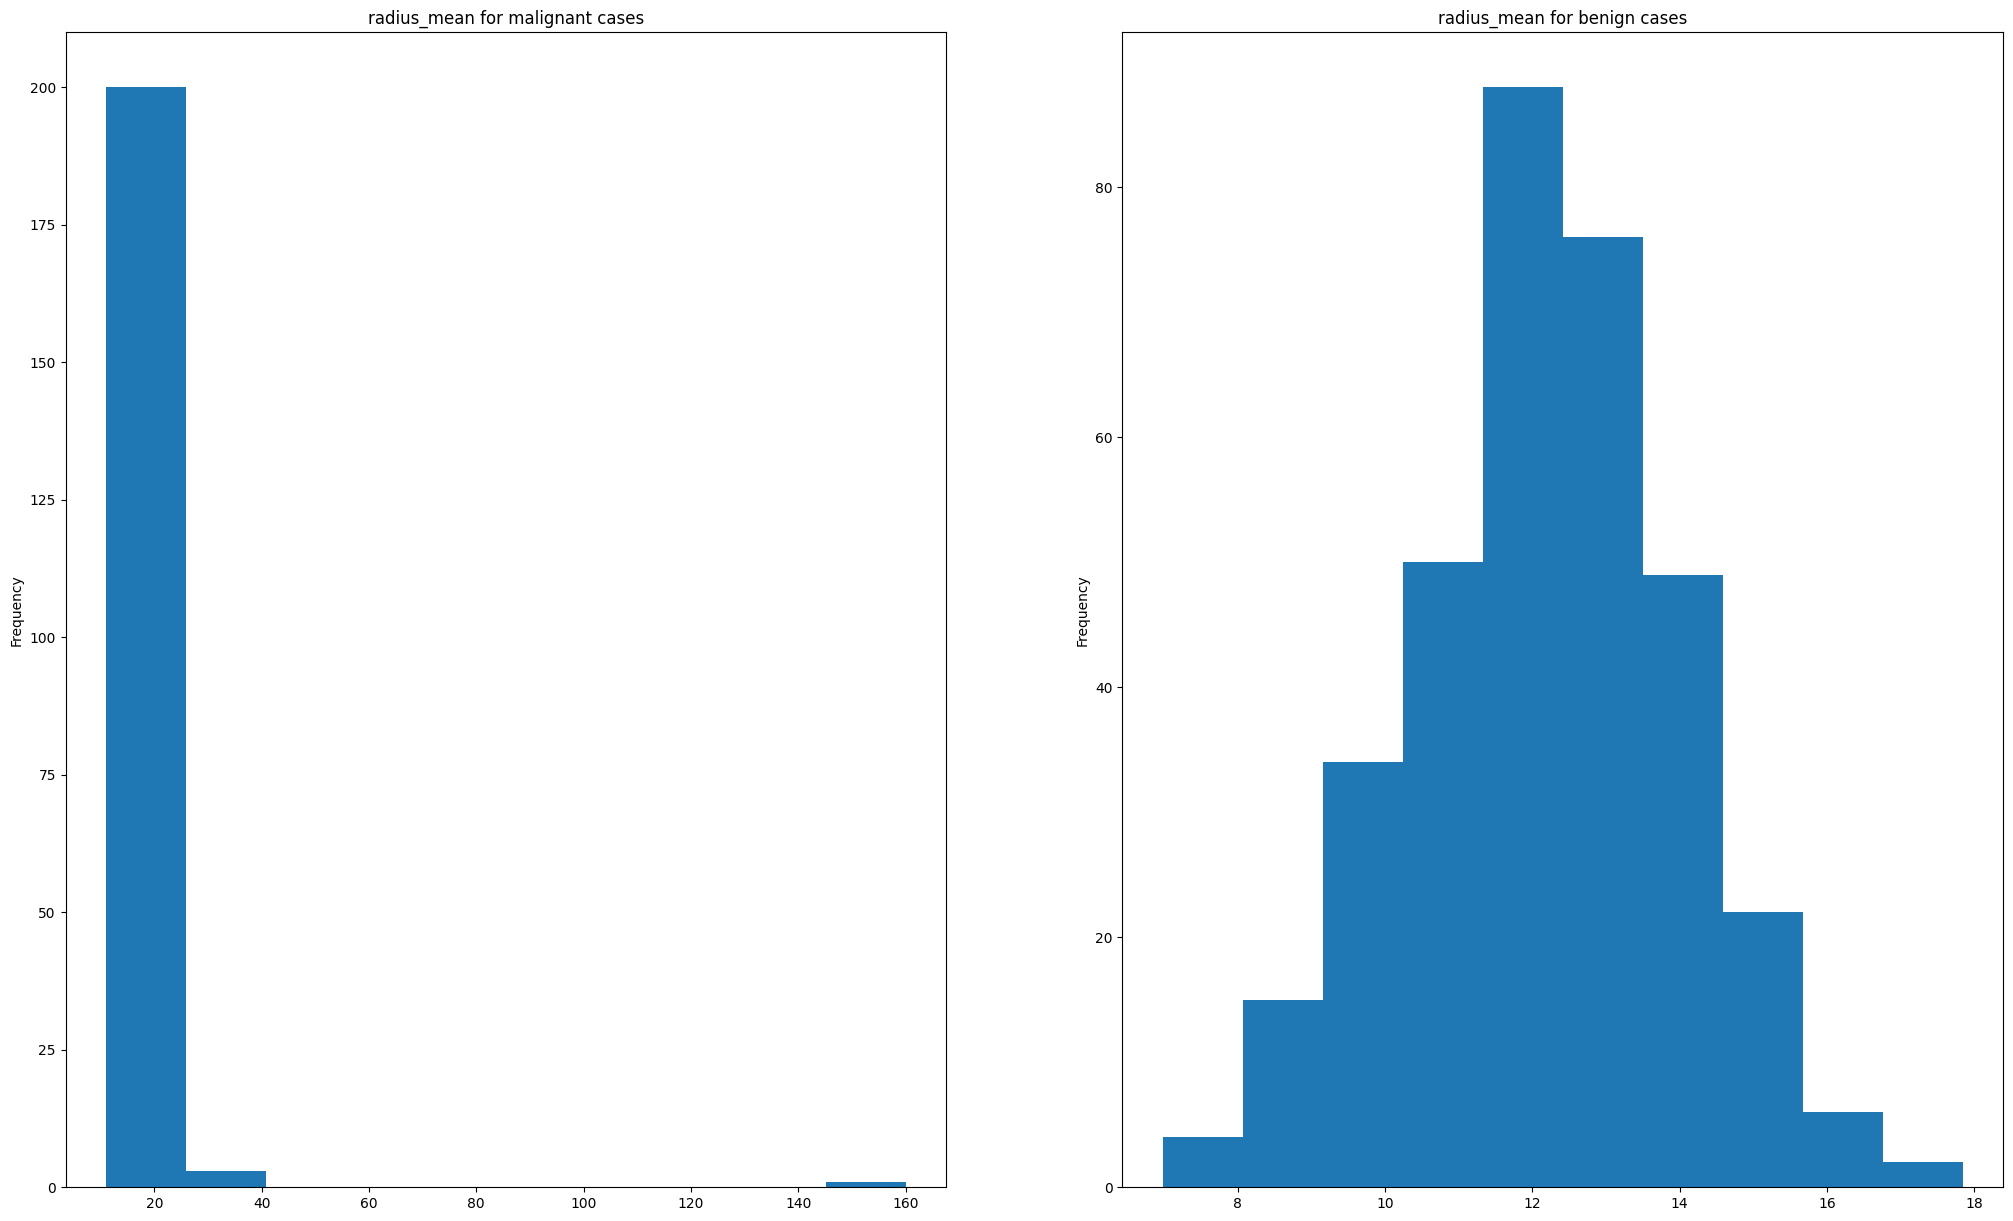

In [18]:
#creating subsets of the dataset, split by class
malignant_df = df[df['class']== 'M']
benign_df = df[df['class']== 'B']

#two histogram graphs
fig = plt.figure();
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,15))

malignant_df['radius_mean'].plot(ax=axs[0], kind='hist', title='radius_mean for malignant cases')
benign_df['radius_mean'].plot(ax=axs[1], kind='hist', title='radius_mean for benign cases')

<Axes: title={'center': 'radius_worst for benign cases'}, ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

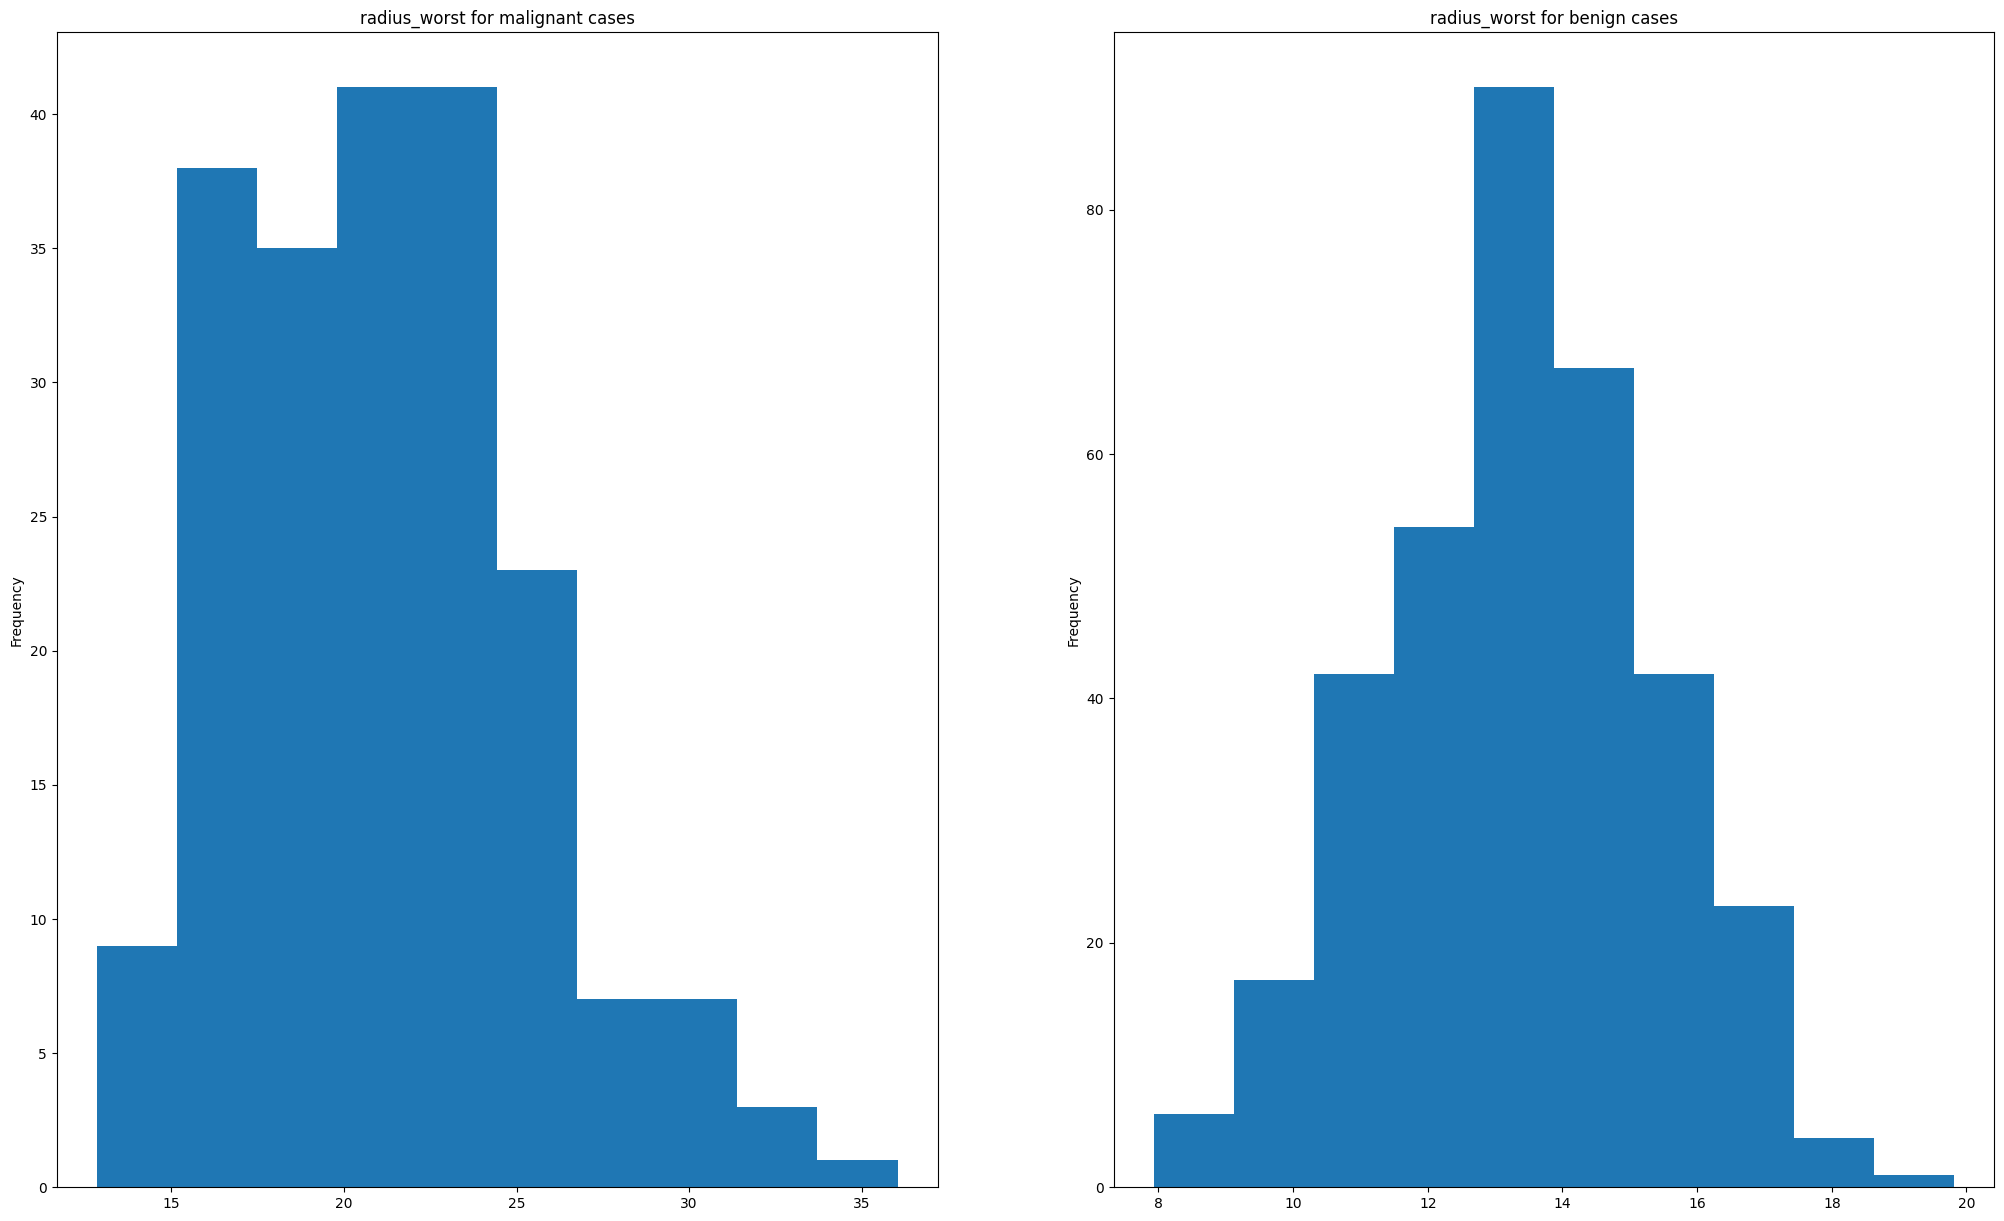

In [19]:
fig = plt.figure();
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,15))

malignant_df['radius_worst'].plot(ax=axs[0], kind='hist', title='radius_worst for malignant cases')
benign_df['radius_worst'].plot(ax=axs[1], kind='hist', title='radius_worst for benign cases')

<Figure size 640x480 with 0 Axes>

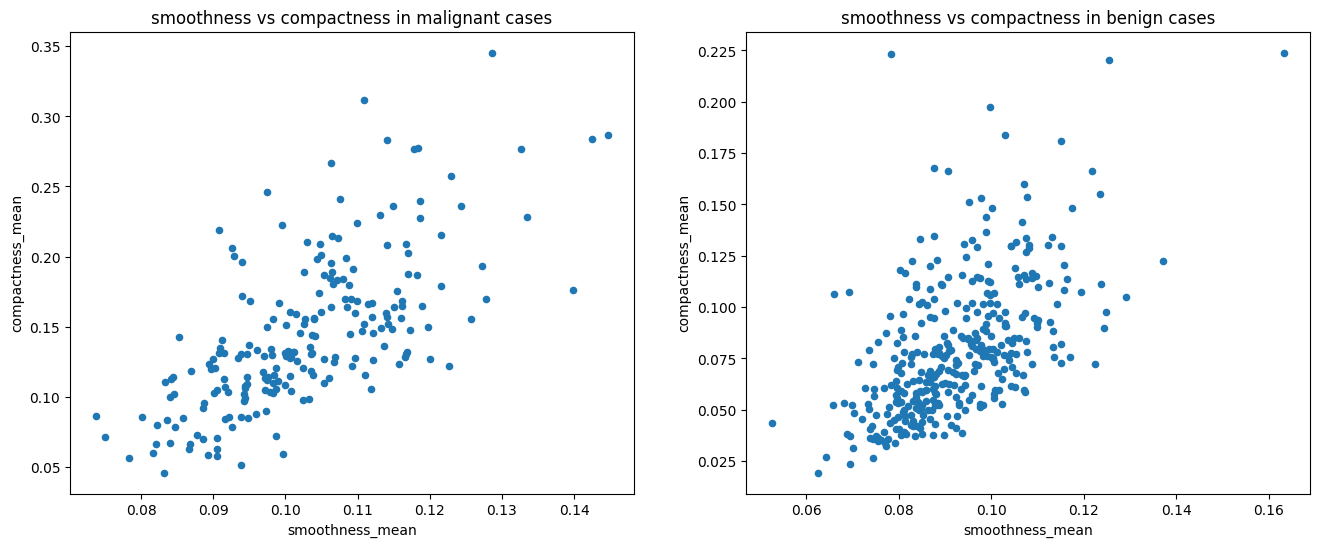

In [21]:
#scatter graph, comparing smoothness vs compactness for both M & B cases
fig = plt.figure();
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


#for malignant
malignant_df.plot(ax=axs[0], kind='scatter', x='smoothness_mean', y='compactness_mean', title='smoothness vs compactness in malignant cases');

#for benign
benign_df.plot(ax=axs[1], kind='scatter', x='smoothness_mean', y='compactness_mean', title='smoothness vs compactness in benign cases');

#assess irregularity of cells in different cases

<Figure size 640x480 with 0 Axes>

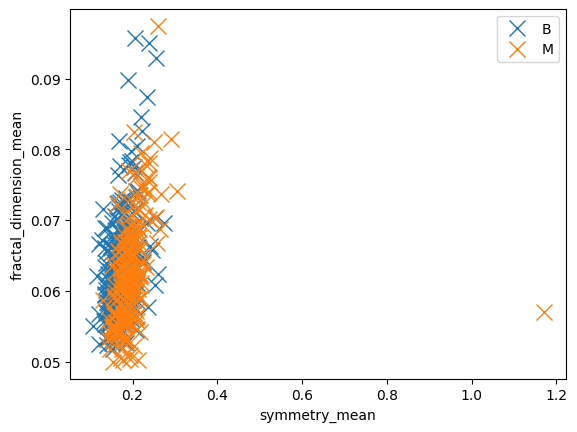

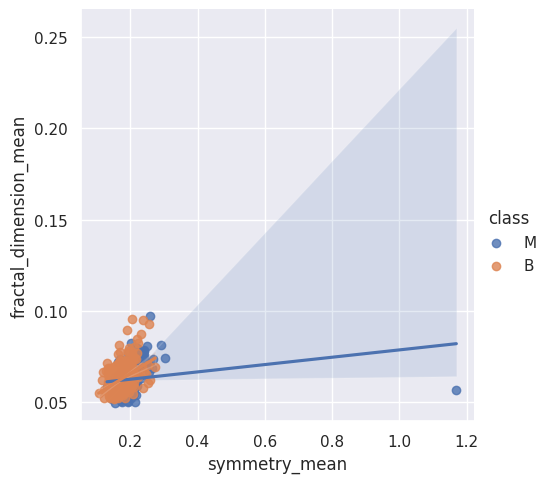

In [24]:
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = df.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.symmetry_mean, group.fractal_dimension_mean, marker='x', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('symmetry_mean')
ax.set_ylabel('fractal_dimension_mean')

# add legend to the figure
ax.legend()

import seaborn as sns
sns.set_theme()
sns.lmplot(data=df, x="symmetry_mean", y="fractal_dimension_mean", hue='class')

## Core data pre-processing
Do core data pre-processing here, which is not part of your machine learning experiments.

For example, this may be to convert non-numeric features into numeric ones.

## Task 2.1 - ML Workflow to Critically Evaluate

In [ ]:
# Dropping all rows with missing values
df = df.dropna()

# Converting all non-numeric (object) features to numeric
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

In [ ]:
# Creating and testing a Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out performance of the model
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))

## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.
